# Methodologies for image processing of radar remote sensing data #

## Lecture 4. Monitoring agricultural (rice) fields ###


## Introduction ##
In this lecture, we focus on monitoring rice fields. We will conduct time series analysis of polarimetric observables from SAR images.

We will use a dataset acquired by TerraSAR-X on rice fields in Ipsala, Turkay (2013).
The full dataset is much bigger, but for reason of space you can find only 3 acquisitions of a cropped area around the rice fields under analysis.

You will track the temporal evolution of polarimetric observables over the rice fields. You will extract the temporal trends (and relate them with the phenological
stages). The process includes:
1. Read the three TerraSAR-X polarimetric images
2. Extract the polarimetric observables
3. Visualise images of observables
4. Plot temporal trends of observables


**To run a cell, first select it. Then, you can either click the "Triangle" button above the notebook, or press ctrl + Enter on your keyboard.**



In [1]:
# Load necessary packages

import numpy as np
import matplotlib.pyplot as plt




## STEP1: Reading & visualizing data files ##

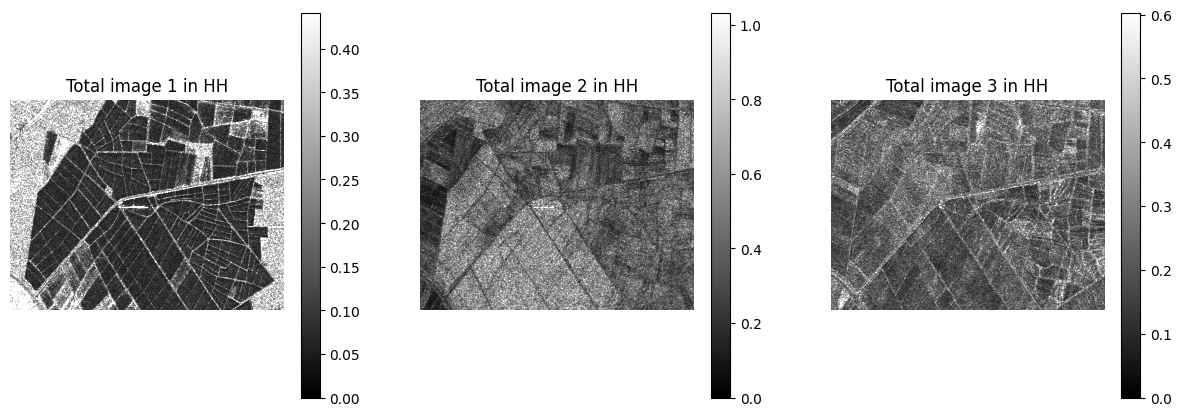

In [2]:
### STEP1: Reading & visualizing data files
# this is the function to read the binary data
def LoadESAR_noheader(path, name, DIM):
    F1 = path + name
    size_r, size_a = DIM[0], DIM[1]
    with open(F1, 'rb') as f:
        data = np.fromfile(f, count=2 * size_r * size_a, dtype='<f4')  # Adjust dtype based on your datatype

    data = data.reshape(size_r * size_a, 2)
    D = data[:, 0] + 1j * data[:, 1]
    image = D.reshape(size_a, size_r)
    image = np.transpose(image)

    return image

# Define the path and file names
Path = './'
NameHH1 = 'HH5.dat'
NameVV1 = 'VV5.dat'
NameHH2 = 'HH7.dat'
NameVV2 = 'VV7.dat'
NameHH3 = 'HH9.dat'
NameVV3 = 'VV9.dat'

# Load images
DIM = (1000, 1300)
HH1 = LoadESAR_noheader(Path, NameHH1, DIM)
VV1 = LoadESAR_noheader(Path, NameVV1, DIM)
HH2 = LoadESAR_noheader(Path, NameHH2, DIM)
VV2 = LoadESAR_noheader(Path, NameVV2, DIM)
HH3 = LoadESAR_noheader(Path, NameHH3, DIM)
VV3 = LoadESAR_noheader(Path, NameVV3, DIM)
dimr, dima = DIM

# visualize images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the images in subfigures
img1 = axs[0].imshow(np.abs(HH1), cmap='gray', vmin=0, vmax=2.5 * np.mean(np.abs(HH1)))
axs[0].set_title('Total image 1 in HH')
axs[0].axis('off')
fig.colorbar(img1, ax=axs[0])

img2 = axs[1].imshow(np.abs(HH2), cmap='gray', vmin=0, vmax=2.5 * np.mean(np.abs(HH2)))
axs[1].set_title('Total image 2 in HH')
axs[1].axis('off')
fig.colorbar(img2, ax=axs[1])

img3 = axs[2].imshow(np.abs(HH3), cmap='gray', vmin=0, vmax=2.5 * np.mean(np.abs(HH3)))
axs[2].set_title('Total image 3 in HH')
axs[2].axis('off')
fig.colorbar(img3, ax=axs[2])

#plt.savefig('your/output/folder/input_data.png', bbox_inches='tight') # you can save the figure if you want
plt.show()


## STEP2: Extract the polarimetric observables ##

First, we build elements of the pauli vector (k1, k2), coherency (T1aa, T1ab,...) & covariance matrix (C1aa, ...).

Please note the notation Notation: 
k1a: "k" refers to the scattering vector, "1" refers to scene # 1, and
"a" refers to the first element in the vector.

**You need to figure fill the blank ('quiz') part.**



In [3]:

## STEP2: Building elements of the pauli vector, coherency & covariance matrix
from scipy.signal import convolve as scipy_convolve

# Build the two Pauli components
k1a = 1 / np.sqrt(2) * (HH1 + VV1)
k1b = 1 / np.sqrt(2) * (HH1 - VV1)
k2a = 1 / np.sqrt(2) * (HH2 + VV2)
k2b = 1 / np.sqrt(2) * (HH2 - VV2)
k3a = 1 / np.sqrt(2) * (HH3 + VV3)
k3b = 1 / np.sqrt(2) * (HH3 - VV3)

# Prepare the window for filtering
sw = (9, 9)
H = np.ones(sw) / (sw[0] * sw[1])  # Create an average filter kernel

# Create the Coherency matrix
print('Create the Coherency matrix...')
T1aa = scipy_convolve(np.abs(k1a) ** 2, H, mode='same', method='direct')
T1bb = scipy_convolve(np.abs(k1b) ** 2, H, mode='same', method='direct')
T1ab = scipy_convolve(k1a * np.conj(k1b), H, mode='same', method='direct')

T2aa = scipy_convolve(np.abs(k2a) ** 2, H, mode='same', method='direct')
T2bb = scipy_convolve(np.abs(k2b) ** 2, H, mode='same', method='direct')
T2ab = scipy_convolve(k2a * np.conj(k2b), H, mode='same', method='direct')

T3aa = scipy_convolve(np.abs(k3a) ** 2, H, mode='same', method='direct')
T3bb = scipy_convolve(np.abs(k3b) ** 2, H, mode='same', method='direct')
T3ab = scipy_convolve(k3a * np.conj(k3b), H, mode='same', method='direct')

# Create the Covariance matrix in Lexicographic basis
print('Create the Covariance matrix...')
C1aa = scipy_convolve(np.abs(HH1) ** 2, H, mode='same', method='direct')
C1bb = scipy_convolve(np.abs(VV1) ** 2, H, mode='same', method='direct')
C1ab = scipy_convolve(HH1 * np.conj(VV1), H, mode='same', method='direct')

C2aa = scipy_convolve(np.abs(HH2) ** 2, H, mode='same', method='direct')
C2bb = scipy_convolve(np.abs(VV2) ** 2, H, mode='same', method='direct')
C2ab = scipy_convolve(HH2 * np.conj(VV2), H, mode='same', method='direct')

C3aa = scipy_convolve(np.abs(HH3) ** 2, H, mode='same', method='direct')
C3bb = scipy_convolve(np.abs(VV3) ** 2, H, mode='same', method='direct')
C3ab = scipy_convolve(HH3 * np.conj(VV3), H, mode='same', method='direct')

print('Finish')

Create the Coherency matrix...
Create the Covariance matrix...
Finish


## STEP3: Visualize the Pauli RGB images


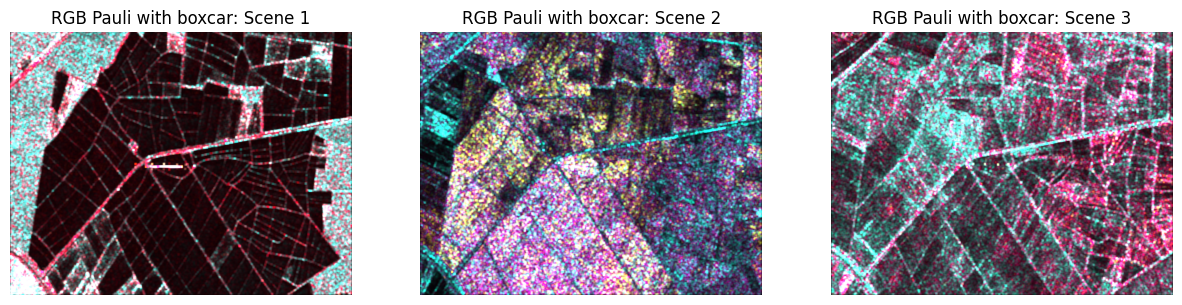

In [4]:
## STEP3: Visualize the Pauli RGB images
i1b = T1aa / np.percentile(T1aa, 95) # normalize the value to be [0,1]
i1r = T1bb / np.percentile(T1bb, 95) 
i1g = np.abs(C1ab) / np.percentile(np.abs(C1ab), 95)
# Clip the normalized values at 1
i1b = np.clip(i1b, 0, 1)
i1r = np.clip(i1r, 0, 1)
i1g = np.clip(i1g, 0, 1)
# plot the RGB image
rgb1Image = np.zeros((dimr, dima, 3))
rgb1Image[:, :, 0] = np.abs(i1r)
rgb1Image[:, :, 2] = np.abs(i1b)
rgb1Image[:, :, 1] = np.abs(i1g)

i2b = T2aa / np.percentile(T2aa, 95)
i2r = T2bb / np.percentile(T2bb, 95)
i2g = np.abs(C2ab) / np.percentile(np.abs(C2ab), 95)
i2b = np.clip(i2b, 0, 1)
i2r = np.clip(i2r, 0, 1)
i2g = np.clip(i2g, 0, 1)
rgb2Image = np.zeros((dimr, dima, 3))
rgb2Image[:, :, 0] = np.abs(i2r)
rgb2Image[:, :, 2] = np.abs(i2b)
rgb2Image[:, :, 1] = np.abs(i2g)

i3b = T3aa / np.percentile(T3aa, 95)
i3r = T3bb / np.percentile(T3bb, 95)
i3g = np.abs(C3ab) / np.percentile(np.abs(C3ab), 95)
i3b = np.clip(i3b, 0, 1)
i3r = np.clip(i3r, 0, 1)
i3g = np.clip(i3g, 0, 1)
rgb3Image = np.zeros((dimr, dima, 3))
rgb3Image[:, :, 0] = np.abs(i3r)
rgb3Image[:, :, 2] = np.abs(i3b)
rgb3Image[:, :, 1] = np.abs(i3g)

# visualize images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the images in subfigures
img1 = axs[0].imshow(rgb1Image)
axs[0].set_title('RGB Pauli with boxcar: Scene 1')
axs[0].axis('off')

img2 = axs[1].imshow(rgb2Image)
axs[1].set_title('RGB Pauli with boxcar: Scene 2')
axs[1].axis('off')

img3 = axs[2].imshow(rgb3Image)
axs[2].set_title('RGB Pauli with boxcar: Scene 3')
axs[2].axis('off')

# Save the figure
#plt.savefig('subfigures_rgb_scenes.png', bbox_inches='tight') # you can save the figure if you want
plt.show()


## STEP4: Now, Let's calculate more polarimetric observables for each scene. 

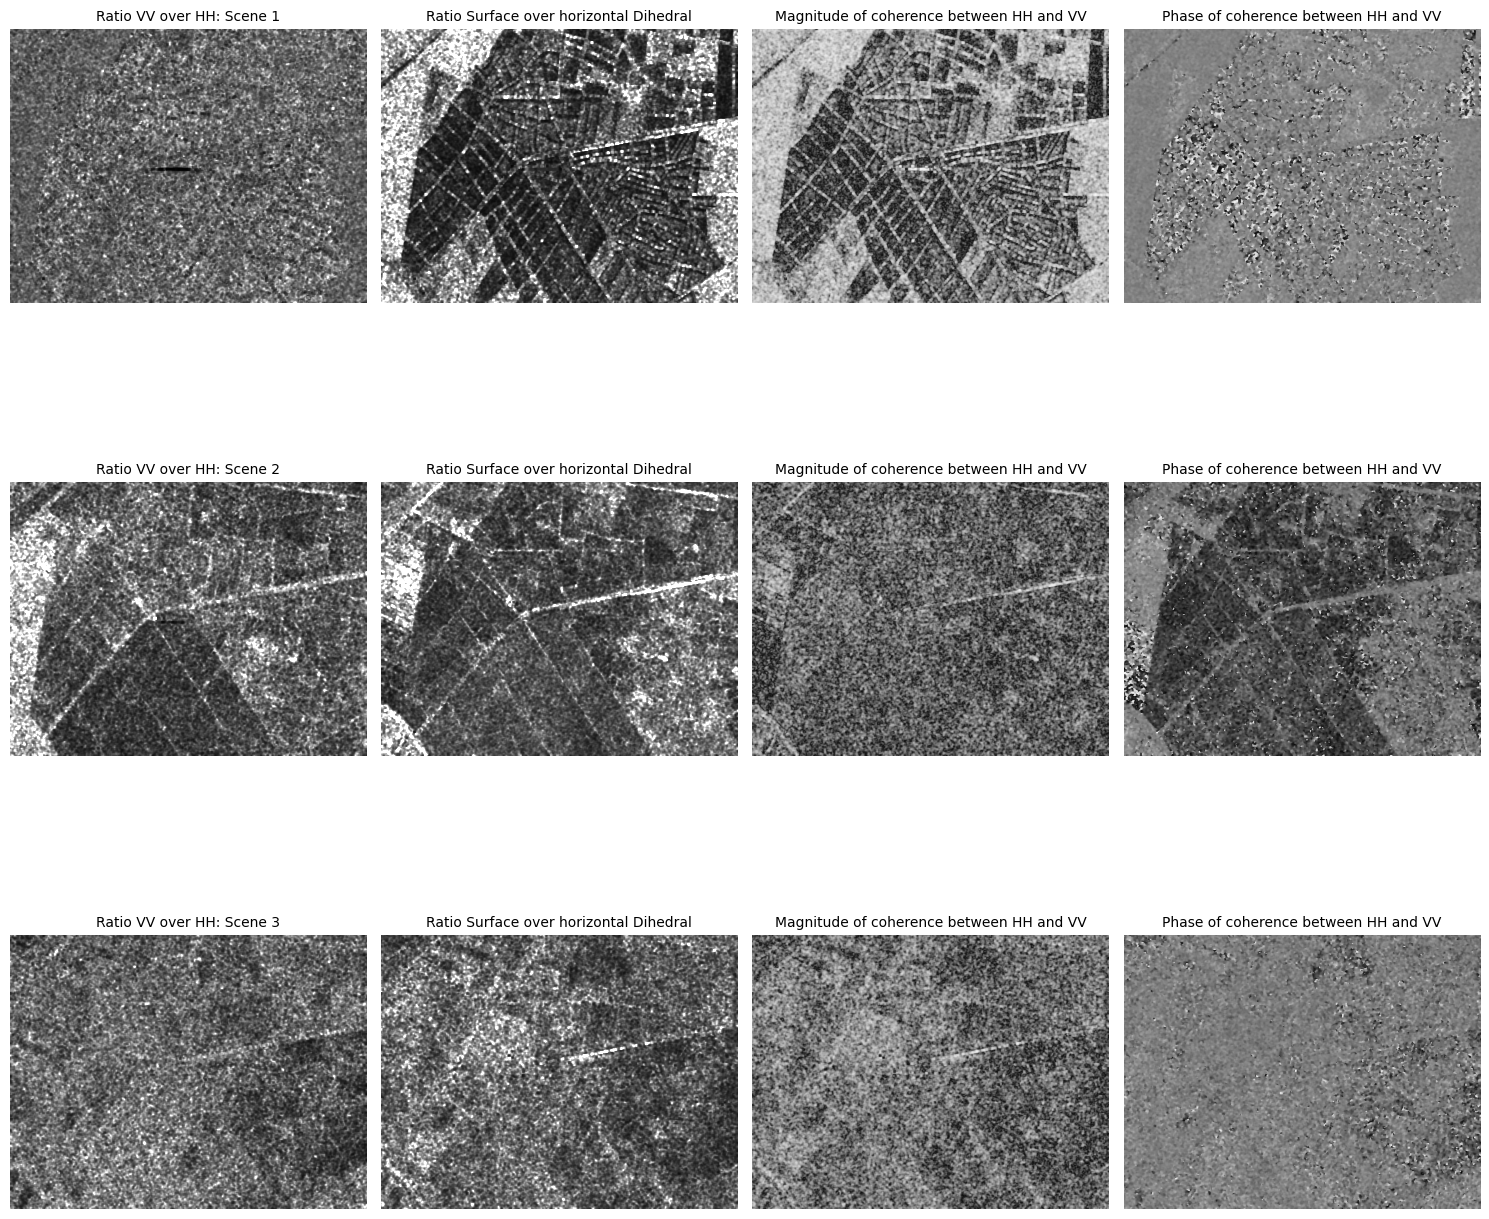

In [5]:
#---Polarimetric observables for scene 1--------
# Observables with ratios: Lexicographic
Ratio1VVHH = C1bb / C1aa

# Observables with ratios: Pauli
Ratio1ab = T1aa / T1bb

# Observables with coherences
Cohe1HHVV = C1ab / np.sqrt(C1aa * C1bb)


#---Polarimetric observables for scene 2--------
# Observables with ratios: Lexicographic
Ratio2VVHH = C2bb / C2aa

# Observables with ratios: Pauli
Ratio2ab = T2aa / T2bb

# Observables with coherences
Cohe2HHVV = C2ab / np.sqrt(C2aa * C2bb)


#---Polarimetric observables for scene 3--------
# Observables with ratios: Lexicographic
Ratio3VVHH = C3bb / C3aa

# Observables with ratios: Pauli
Ratio3ab = T3aa / T3bb

# Observables with coherences
Cohe3HHVV = C3ab / np.sqrt(C3aa * C3bb)


# Now, let's visualize the polarimetric observables in subfigures
fig, axs = plt.subplots(3, 4, figsize=(15, 15))

# Function to plot images in subfigures
def plot_image(ax, image, title, vmin=None, vmax=None):
    im = ax.imshow(image, cmap='gray', vmin=vmin, vmax=vmax)
    ax.set_title(title,fontsize=10)
    ax.axis('off')
    return im

# Visualize the Ratios and Coherences for each scene
scenes = ['Scene 1', 'Scene 2', 'Scene 3']
ratios = [Ratio1VVHH, Ratio2VVHH, Ratio3VVHH]
surface_ratios = [Ratio1ab, Ratio2ab, Ratio3ab]
coherences_magnitude = [np.abs(Cohe1HHVV), np.abs(Cohe2HHVV), np.abs(Cohe3HHVV)]
coherences_phase = [np.angle(Cohe1HHVV), np.angle(Cohe2HHVV), np.angle(Cohe3HHVV)]

for i, scene in enumerate(scenes):
    row = i
    im1 = plot_image(axs[row, 0], ratios[i], f'Ratio VV over HH: {scene}',vmin=0, vmax=2.5 * np.mean(np.mean(ratios[i])))
    im2 = plot_image(axs[row, 1], surface_ratios[i], f'Ratio Surface over horizontal Dihedral',vmin=0, vmax=2.5 * np.mean(np.mean(surface_ratios[i])))
    im3 = plot_image(axs[row, 2], coherences_magnitude[i], f'Magnitude of coherence between HH and VV',vmin=0, vmax=1)
    im4 = plot_image(axs[row, 3], coherences_phase[i], f'Phase of coherence between HH and VV',vmin=-np.pi, vmax=np.pi)

plt.tight_layout()
# Save the figure
#plt.savefig('subfigures_ratios_coherences.png', bbox_inches='tight')
plt.show()


## Step 5: Trend Analysis ##
we will focus on a single field (ROI) and evaluate the temporal trends.
Once the values are estimated the trends can be used to understand if the physical model exploited is suited


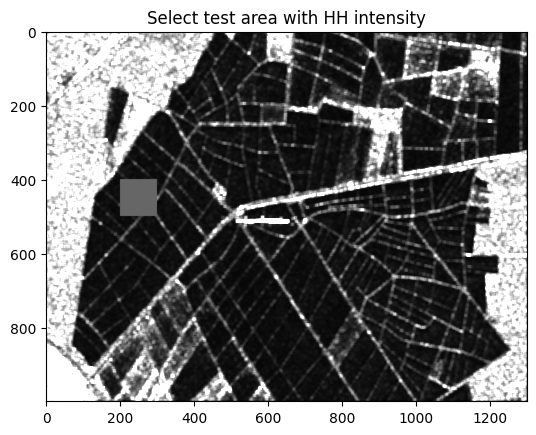

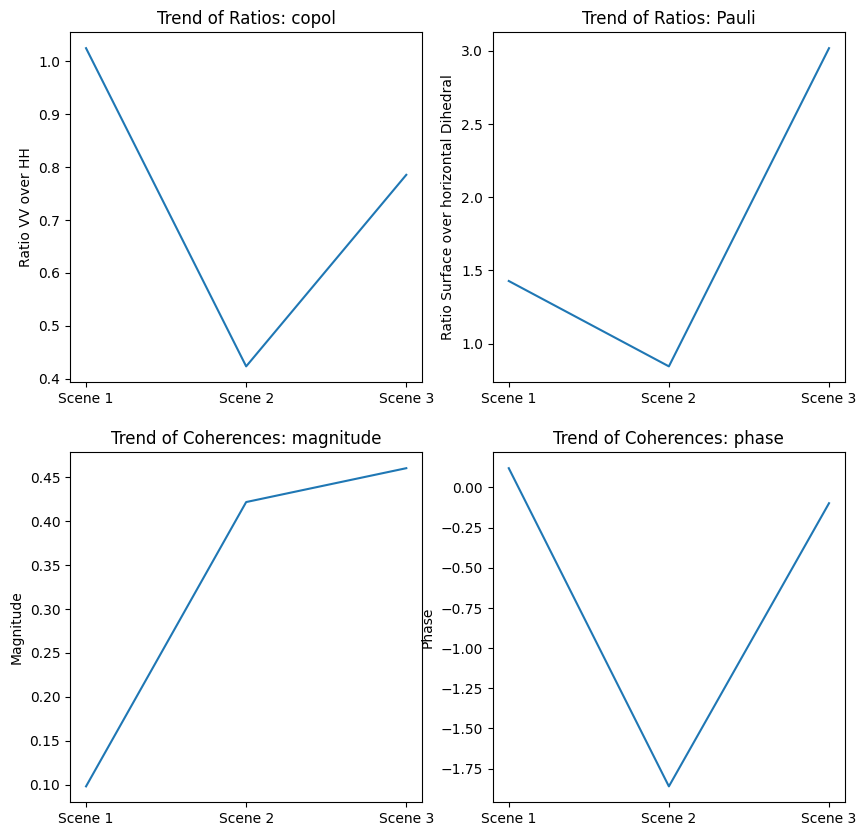

In [6]:
# Region of Interest (ROI) analysis
# Define the ROI coordinates
rg_start = 400
rg_end = 500
az_start = 200
az_end = 300

# Ensure that the area is contained in one field
Test_Area = C1aa.copy()
Test_Area[rg_start:rg_end, az_start:az_end] = np.mean(np.mean(C1aa))
plt.figure()
plt.imshow(Test_Area, cmap='gray', vmin=0, vmax=2.5 * np.mean(np.mean(C1aa)))
plt.title('Select test area with HH intensity')

# Plot the trends: we want to extract the mean value of the polarimetric obsevable inside the ROI.
# First Acquisition:
Av_Ratio1VVHH = np.mean(np.mean(Ratio1VVHH[rg_start:rg_end, az_start:az_end]))
Av_Ratio1ab = np.mean(np.mean(Ratio1ab[rg_start:rg_end, az_start:az_end]))
Av_Cohe1HHVV = np.mean(np.mean(Cohe1HHVV[rg_start:rg_end, az_start:az_end]))

# Second Acquisition:
Av_Ratio2VVHH = np.mean(np.mean(Ratio2VVHH[rg_start:rg_end, az_start:az_end]))
Av_Ratio2ab = np.mean(np.mean(Ratio2ab[rg_start:rg_end, az_start:az_end]))
Av_Cohe2HHVV = np.mean(np.mean(Cohe2HHVV[rg_start:rg_end, az_start:az_end]))

# Third Acquisition:
Av_Ratio3VVHH = np.mean(np.mean(Ratio3VVHH[rg_start:rg_end, az_start:az_end]))
Av_Ratio3ab = np.mean(np.mean(Ratio3ab[rg_start:rg_end, az_start:az_end]))
Av_Cohe3HHVV = np.mean(np.mean(Cohe3HHVV[rg_start:rg_end, az_start:az_end]))

# Create the trends arrays
Trend_RatioVVHH = [Av_Ratio1VVHH, Av_Ratio2VVHH, Av_Ratio3VVHH]
Trend_Ratioab = [Av_Ratio1ab, Av_Ratio2ab, Av_Ratio3ab]
Trend_CoheHHVV = [Av_Cohe1HHVV, Av_Cohe2HHVV, Av_Cohe3HHVV]

scene_labels = ["Scene 1", "Scene 2", "Scene 3"]

# Plot the trends
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Function to plot trends in subfigures
def plot_trend(ax, trend, title, ylabel):
    ax.plot(trend)
    ax.set_title(title)
    ax.set_xticks(range(3))
    ax.set_xticklabels(scene_labels)
    ax.set_ylabel(ylabel)

# Plot the trends in subfigures
plot_trend(axs[0, 0], Trend_RatioVVHH, 'Trend of Ratios: copol', 'Ratio VV over HH')
plot_trend(axs[0, 1], Trend_Ratioab, 'Trend of Ratios: Pauli', 'Ratio Surface over horizontal Dihedral')
plot_trend(axs[1, 0], np.abs(Trend_CoheHHVV), 'Trend of Coherences: magnitude', 'Magnitude')
plot_trend(axs[1, 1], np.angle(Trend_CoheHHVV), 'Trend of Coherences: phase', 'Phase')

# Save the figure
#plt.savefig('subfigures_trends.png', bbox_inches='tight') # you can save the figure if you want

plt.show()

## Conclusion ##
**Co-pol ratio**

Date 1: the ratio is close to one. This is because the signal is very low due to the specular reflection from the water and we are observing a weak surface “submerged” in thermal noise.

Date 2: The ratio is small. An explanation is that we have scattering from underneath surface (in the form of double bounces) with vertical attenuators.

Date 3: The ratio increases, because the direct scattering is contributing more and the plants are less vertically oriented. It looks more like a random volume.



**Pauli ratio**

Date 1: the ratio is close to one, but slightly higher. This is because the weak surface scattering is contributing to the return (note: it was difficult to observe this with the previous observable).

Date 2: The ratio is 1. The double-bounce underneath seems not too be as an ordinary double-bounce from a “diplane” or “dihedral”. This is for the anisotropic nature of the plant reflectors. It is harder to interpret.

Date 3: The ratio increases, because the direct scattering is contributing more and the plant are more randomly oriented. This is expected for dipoles random volumes.


**Co-pol coherences: magnitude**

Date 1: the strong contribution of noise decorelates the images.

Date 2: The double-bounce contribution is increasing the value. Again the anisotropic nature of the volume produce a value that is not very high.

Date 3: The anisotropic and random nature of the volume produces a coherence that is in the middle range of values.



**Co-pol coherences: phase**

Date 1: The magnitude is too low and we cannot use the phase.

Date 2: The double-bounce contribution is reducing the value of the phase but we do not have the value of pi (or -pi) that is characteristic of dihederal. It is more complex.

Date 3: The surface contribution and randomness of the volume move the values of the phase toward zero.